##Credit Card Fraud Detection DataMining

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from scipy.stats import norm

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Credit_card_data/creditcard.csv')

## Data Exploration and Cleaning


In [4]:
# Display the first few rows
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:

# Display summary statistics
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
# Target Variable Analysis
target_analysis = df.groupby('Class').size().reset_index(name='cnt')
target_analysis['freq'] = target_analysis['cnt'] / target_analysis['cnt'].sum()
target_analysis = target_analysis.sort_values(by='freq', ascending=False).reset_index(drop=True)

print(target_analysis)

   Class     cnt      freq
0      0  284315  0.998273
1      1     492  0.001727


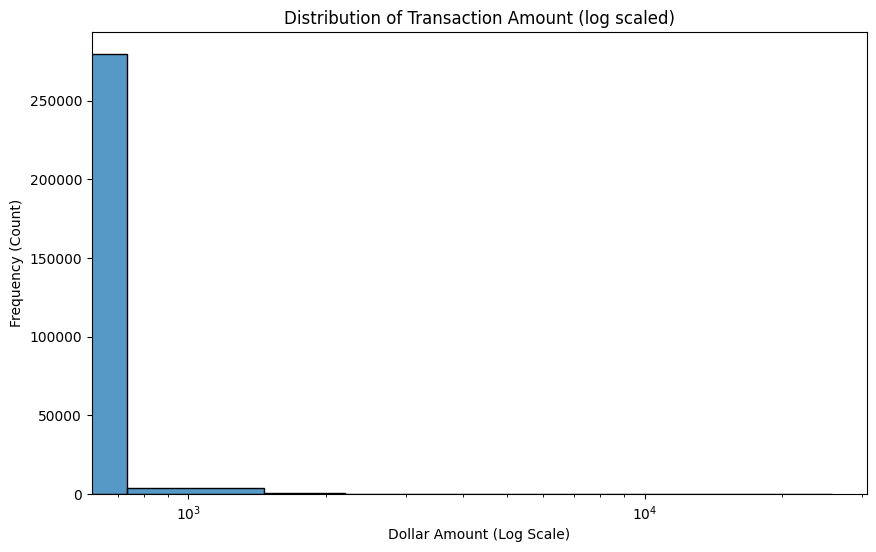

In [7]:
# Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=35, kde=False)
plt.xscale('log')
plt.xlabel('Dollar Amount (Log Scale)')
plt.ylabel('Frequency (Count)')
plt.title('Distribution of Transaction Amount (log scaled)')
plt.show()

In [8]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 1081


In [10]:
# Drop duplicates
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 283726


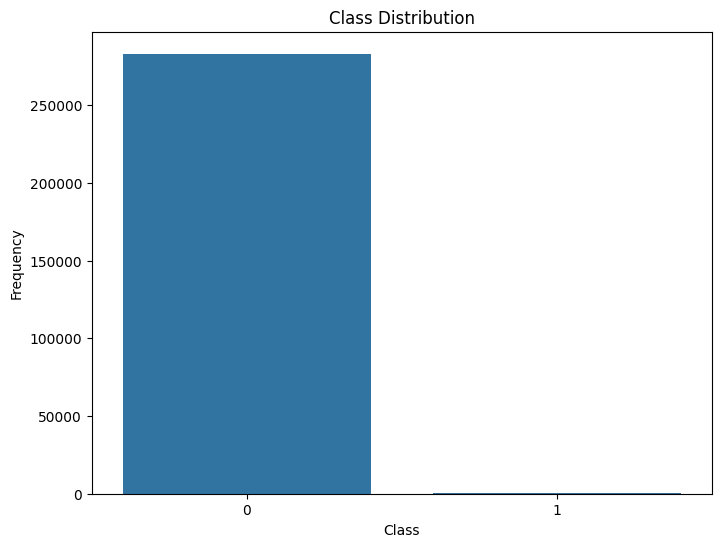

Class
0    283253
1       473
Name: count, dtype: int64


In [11]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Calculate the class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

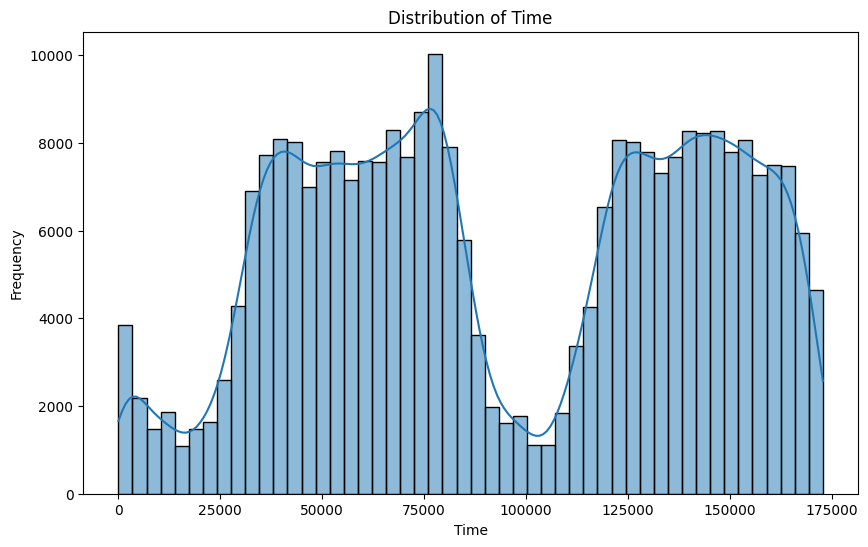

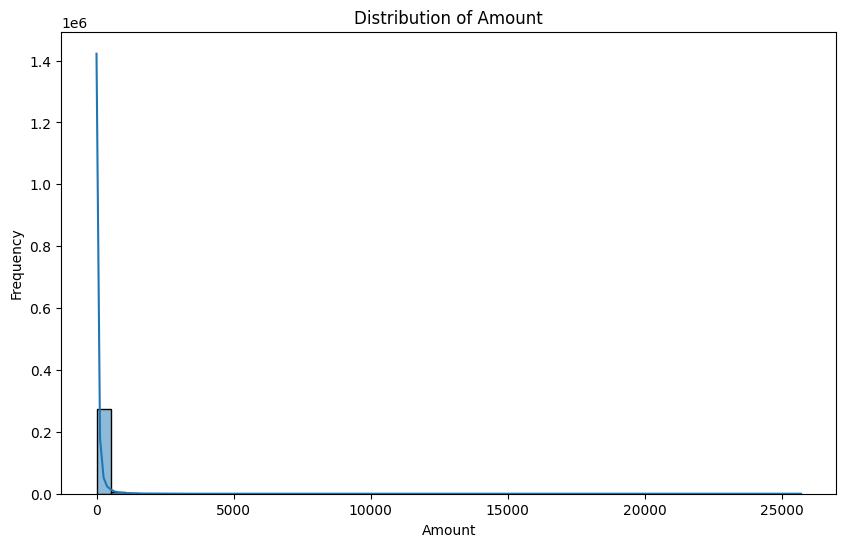

In [12]:
# Plot the distribution of the 'Time' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

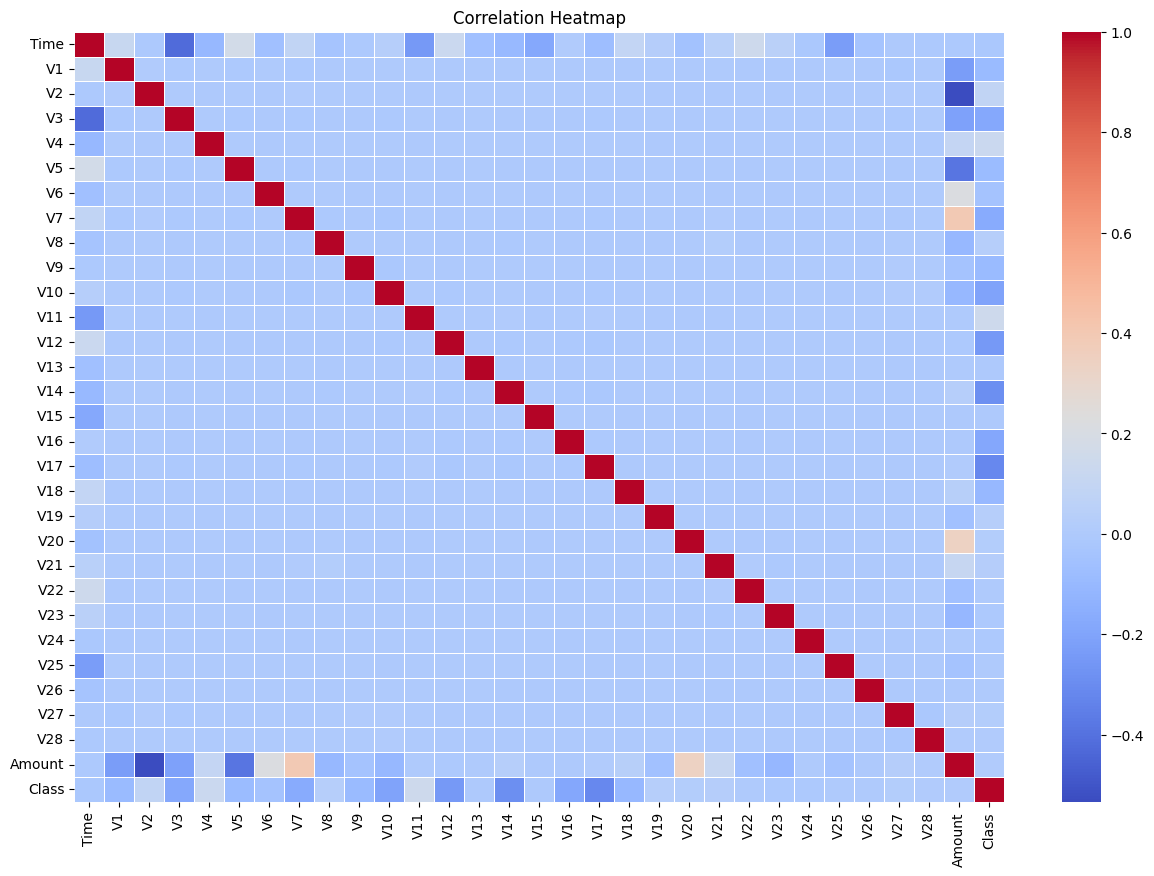

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [14]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [16]:
# Count of class 1 samples after SMOTE
counter = 0
for value in y_resampled:
  if value == 1:
    counter += 1

print(f"number of class 1 samples after SMOT: {counter}")
print(f"number of class 0 samples after SMOT: {len(y_resampled) - counter}")

number of class 1 samples after SMOT: 283253
number of class 0 samples after SMOT: 283253


In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 453204
Testing set size: 113302


In [18]:
(283726, 31)

(283726, 31)

##Dimentionality Reduction

### Principal Component Analysis (PCA)

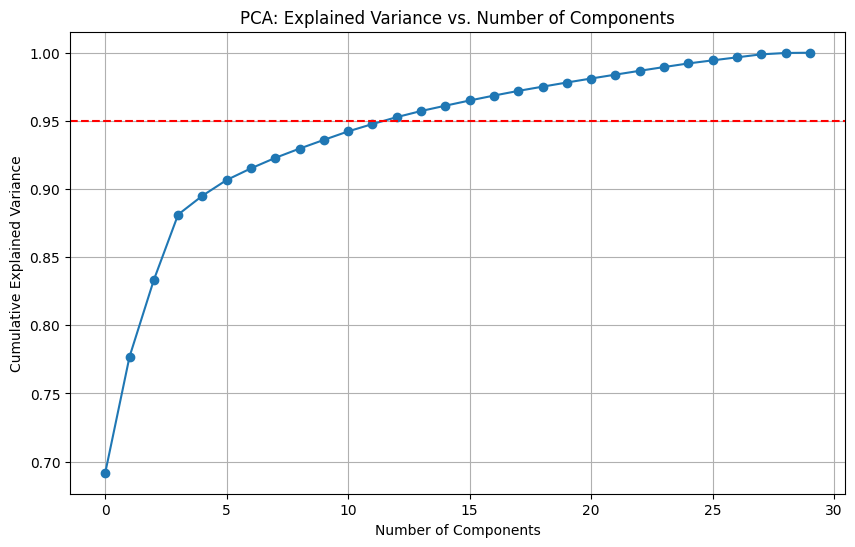

Number of PCA components to explain 95% variance: 13


In [19]:
# PCA: Finding the number of components to explain 95% variance
pca = PCA().fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Determine the number of components for 95% variance
n_components_pca = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of PCA components to explain 95% variance: {n_components_pca}')

# Apply PCA with determined number of components
pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

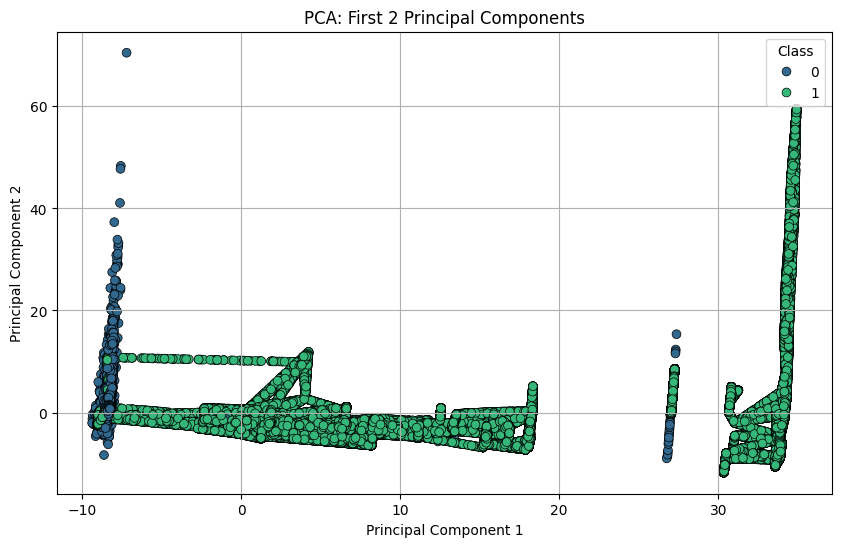

In [20]:
# Apply PCA with determined number of components
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', edgecolor='k', s=40)
plt.title('PCA: First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [21]:
n_classes = len(set(y_train))

### Linear Discriminant Analysis (LDA)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Applying LDA
lda = LDA(n_components=n_classes -1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


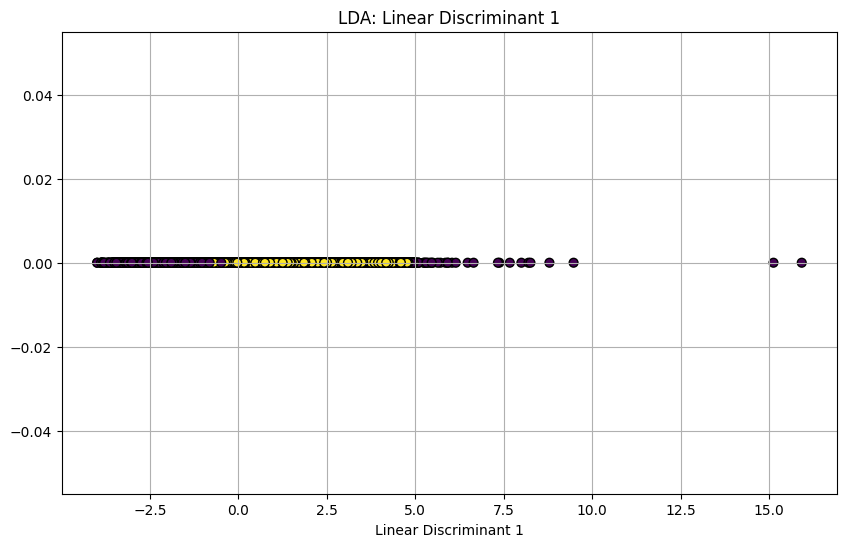

In [23]:
# Plotting LDA component for visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[:, 0], np.zeros_like(X_train_lda), c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('LDA: Linear Discriminant 1')
plt.xlabel('Linear Discriminant 1')
plt.grid(True)
plt.show()

# Classification Models with PCA

##Logistic regresion using PCA

In [24]:
# Train Logistic Regression on PCA transformed data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
y_proba_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
# Evaluation metrics
print("Logistic Regression with PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca)}")
print("Classification Report:\n", classification_report(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_pca)}")


Logistic Regression with PCA:
Accuracy: 0.9350232122998712
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     56463
           1       0.97      0.90      0.93     56839

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.93    113302
weighted avg       0.94      0.94      0.93    113302

Confusion Matrix:
 [[55018  1445]
 [ 5917 50922]]
ROC-AUC Score: 0.9849023405102765


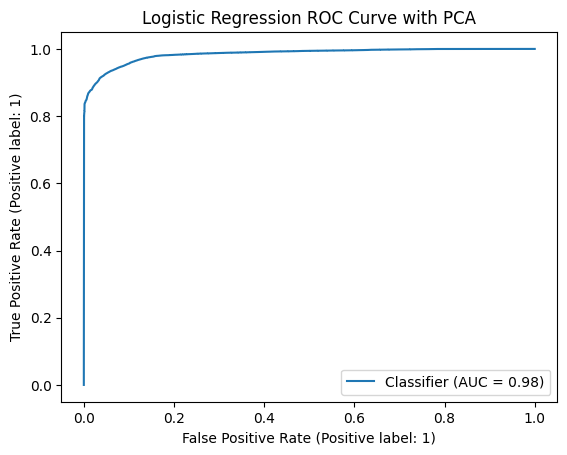

In [26]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_pca)
plt.title('Logistic Regression ROC Curve with PCA')
plt.show()

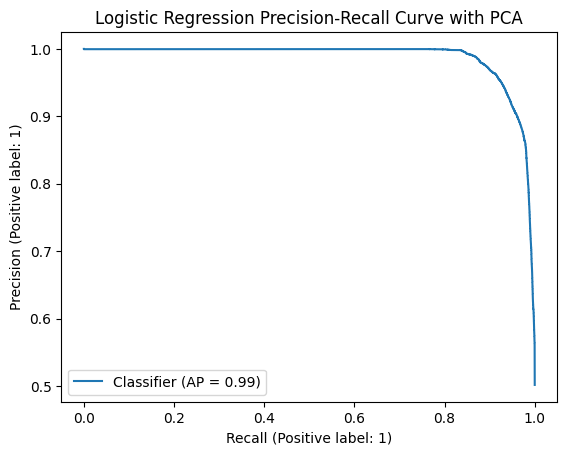

In [27]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_pca)
plt.title('Logistic Regression Precision-Recall Curve with PCA')
plt.show()

##Decision Tree with PCA

In [28]:
# Train Decision Tree on PCA transformed data
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train_pca, y_train)
y_pred_pca_dt = dt_pca.predict(X_test_pca)
y_proba_pca_dt = dt_pca.predict_proba(X_test_pca)[:, 1]

In [29]:

# Evaluation metrics
print("Decision Tree with PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca_dt)}")
print("Classification Report:\n", classification_report(y_test, y_pred_pca_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca_dt))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_pca_dt)}")

Decision Tree with PCA:
Accuracy: 0.9960459656493266
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
 [[56252   211]
 [  237 56602]]
ROC-AUC Score: 0.9960466836402535


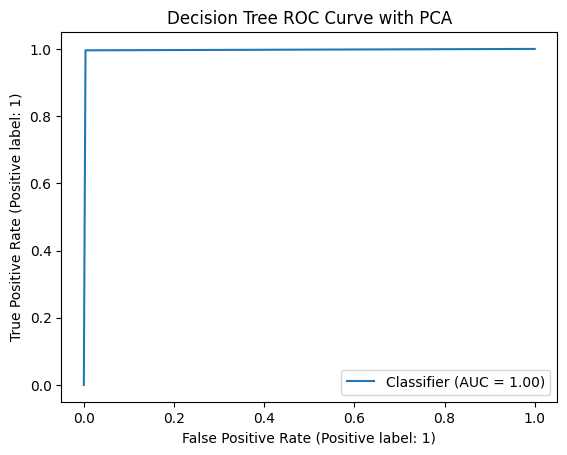

In [30]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_pca_dt)
plt.title('Decision Tree ROC Curve with PCA')
plt.show()

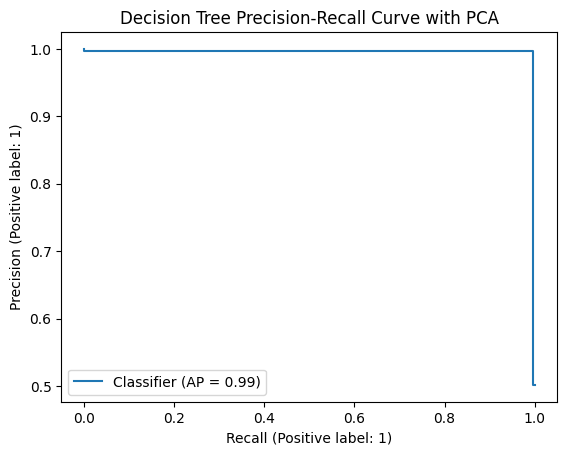

In [31]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_pca_dt)
plt.title('Decision Tree Precision-Recall Curve with PCA')
plt.show()

##Random Forest with PCA

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on PCA transformed data
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca_rf = rf_pca.predict(X_test_pca)
y_proba_pca_rf = rf_pca.predict_proba(X_test_pca)[:, 1]

In [33]:

# Evaluation metrics
print("Random Forest with PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_pca_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_pca_rf)}")

Random Forest with PCA:
Accuracy: 0.9995940054014933
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Confusion Matrix:
 [[56429    34]
 [   12 56827]]
ROC-AUC Score: 0.9999871870831195


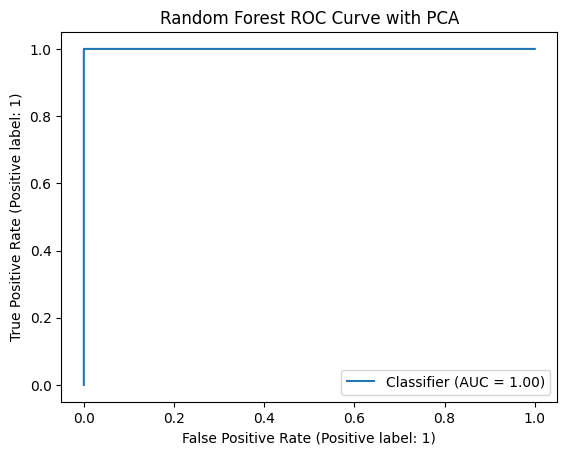

In [34]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_pca_rf)
plt.title('Random Forest ROC Curve with PCA')
plt.show()

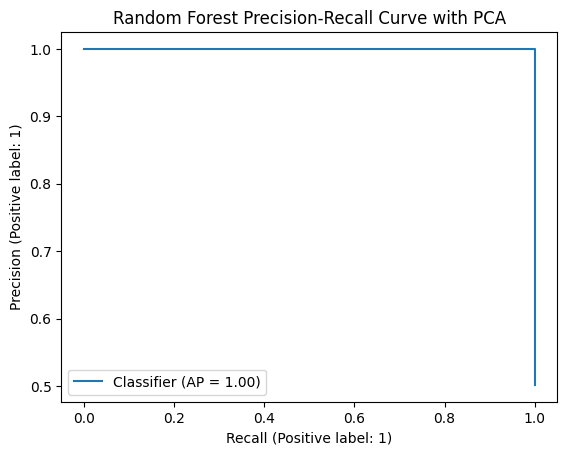

In [35]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_pca_rf)
plt.title('Random Forest Precision-Recall Curve with PCA')
plt.show()

# Classification Models with LDA

# Logistic Regression with LDA

In [36]:

# Train Logistic Regression on LDA transformed data
log_reg_lda = LogisticRegression()
log_reg_lda.fit(X_train_lda, y_train)
y_pred_lda = log_reg_lda.predict(X_test_lda)
y_proba_lda = log_reg_lda.predict_proba(X_test_lda)[:, 1]

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Evaluation metrics
print("Logistic Regression with LDA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda)}")
print("Classification Report:\n", classification_report(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_lda)}")


Logistic Regression with LDA:
Accuracy: 0.930521967838167
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     56463
           1       0.96      0.90      0.93     56839

    accuracy                           0.93    113302
   macro avg       0.93      0.93      0.93    113302
weighted avg       0.93      0.93      0.93    113302

Confusion Matrix:
 [[54220  2243]
 [ 5629 51210]]
ROC-AUC Score: 0.9760992509028893


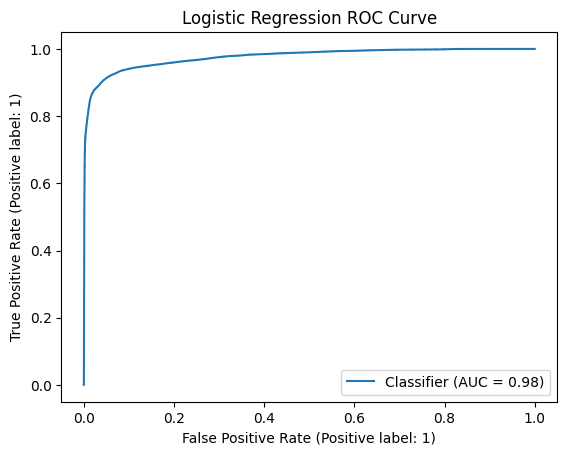

In [38]:

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_lda)
plt.title('Logistic Regression ROC Curve')
plt.show()


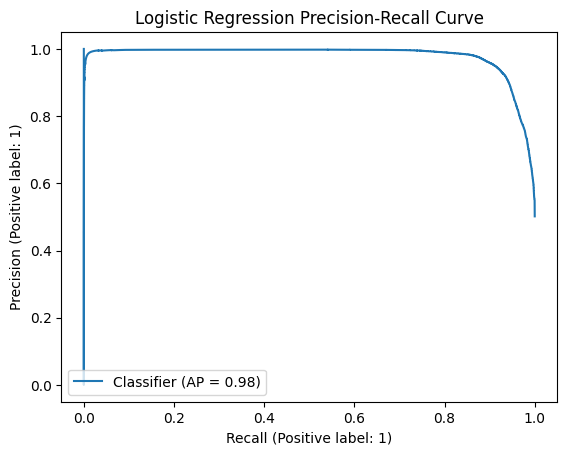

In [39]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lda)
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

#Decision Tree with LDA

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on LDA transformed data
dt_lda = DecisionTreeClassifier()
dt_lda.fit(X_train_lda, y_train)
y_pred_lda_dt = dt_lda.predict(X_test_lda)
y_proba_lda_dt = dt_lda.predict_proba(X_test_lda)[:, 1]


In [41]:
# Evaluation metrics
print("Decision Tree with LDA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda_dt)}")
print("Classification Report:\n", classification_report(y_test, y_pred_lda_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda_dt))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_lda_dt)}")

Decision Tree with LDA:
Accuracy: 0.8962419021729537
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     56463
           1       0.90      0.89      0.90     56839

    accuracy                           0.90    113302
   macro avg       0.90      0.90      0.90    113302
weighted avg       0.90      0.90      0.90    113302

Confusion Matrix:
 [[50719  5744]
 [ 6012 50827]]
ROC-AUC Score: 0.8964586038445823


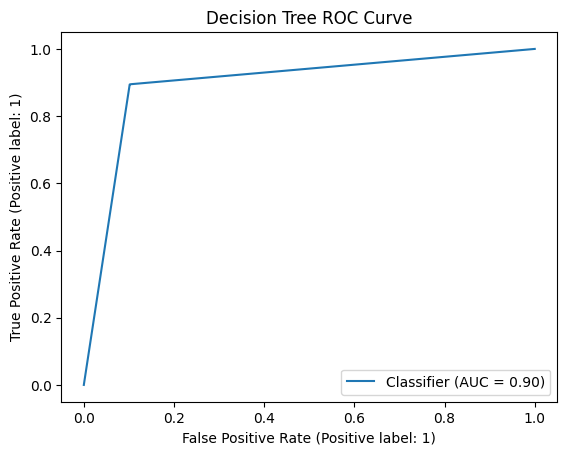

In [42]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_lda_dt)
plt.title('Decision Tree ROC Curve')
plt.show()

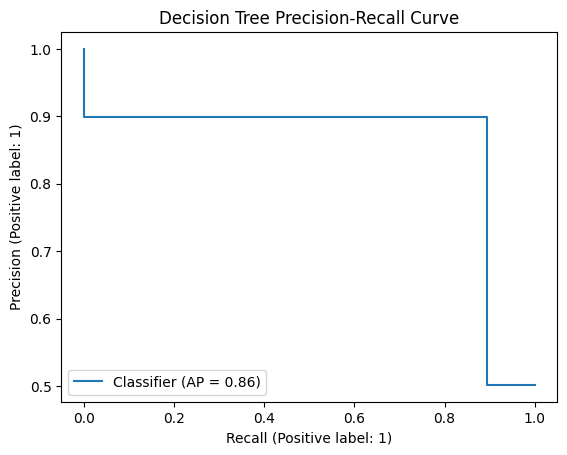

In [43]:
# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lda_dt)
plt.title('Decision Tree Precision-Recall Curve')
plt.show()

##Random Forest with LDA

In [44]:
# Train Random Forest on LDA transformed data
rf_lda = RandomForestClassifier(random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda_rf = rf_lda.predict(X_test_lda)
y_proba_lda_rf = rf_lda.predict_proba(X_test_lda)[:, 1]

In [45]:
# Evaluation metrics
print("Random Forest with LDA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_lda_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_lda_rf)}")

Random Forest with LDA:
Accuracy: 0.8962948579901502
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     56463
           1       0.90      0.89      0.90     56839

    accuracy                           0.90    113302
   macro avg       0.90      0.90      0.90    113302
weighted avg       0.90      0.90      0.90    113302

Confusion Matrix:
 [[50701  5762]
 [ 5988 50851]]
ROC-AUC Score: 0.9552764710181826


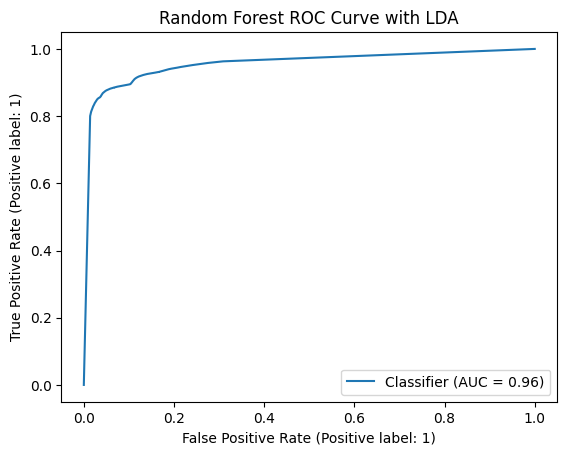

In [46]:

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_lda_rf)
plt.title('Random Forest ROC Curve with LDA')
plt.show()

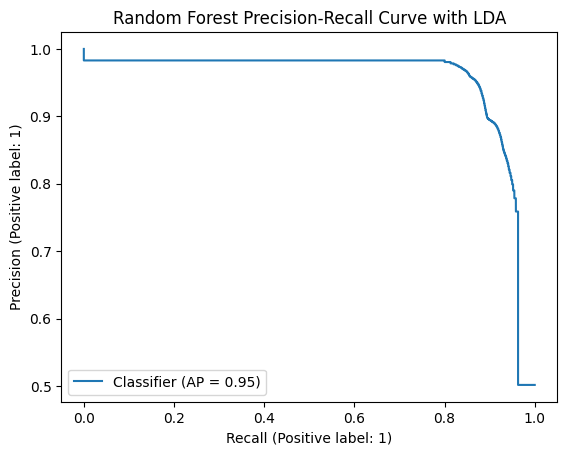

In [47]:

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lda_rf)
plt.title('Random Forest Precision-Recall Curve with LDA')
plt.show()

##Comparison of PCA and LDA Models

In [48]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
# Store evaluation metrics for comparison
results = {
    "Model": [],
    "Dimensionality Reduction": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

def evaluate_model(y_true, y_pred, y_proba, model_name, dim_reduction):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    results["Model"].append(model_name)
    results["Dimensionality Reduction"].append(dim_reduction)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["ROC-AUC"].append(roc_auc)

# Logistic Regression with PCA
evaluate_model(y_test, y_pred_pca, y_proba_pca, "Logistic Regression", "PCA")

# Logistic Regression with LDA
evaluate_model(y_test, y_pred_lda, y_proba_lda, "Logistic Regression", "LDA")

# Decision Tree with PCA
evaluate_model(y_test, y_pred_pca_dt, y_proba_pca_dt, "Decision Tree", "PCA")

# Decision Tree with LDA
evaluate_model(y_test, y_pred_lda_dt, y_proba_lda_dt, "Decision Tree", "LDA")

# Random Forest with PCA
evaluate_model(y_test, y_pred_pca_rf, y_proba_pca_rf, "Random Forest", "PCA")

# Random Forest with LDA
evaluate_model(y_test, y_pred_lda_rf, y_proba_lda_rf, "Random Forest", "LDA")

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


                 Model Dimensionality Reduction  Accuracy  Precision  \
0  Logistic Regression                      PCA  0.934900   0.972309   
1  Logistic Regression                      LDA  0.930522   0.958038   
2        Decision Tree                      PCA  0.996196   0.996147   
3        Decision Tree                      LDA  0.896242   0.898464   
4        Random Forest                      PCA  0.999267   0.999384   
5        Random Forest                      LDA  0.896295   0.898221   

     Recall  F1-Score   ROC-AUC  
0  0.895741  0.932455  0.984858  
1  0.900966  0.928626  0.976099  
2  0.996270  0.996209  0.996196  
3  0.894228  0.896341  0.896459  
4  0.999156  0.999270  0.999996  
5  0.894650  0.896432  0.955276  


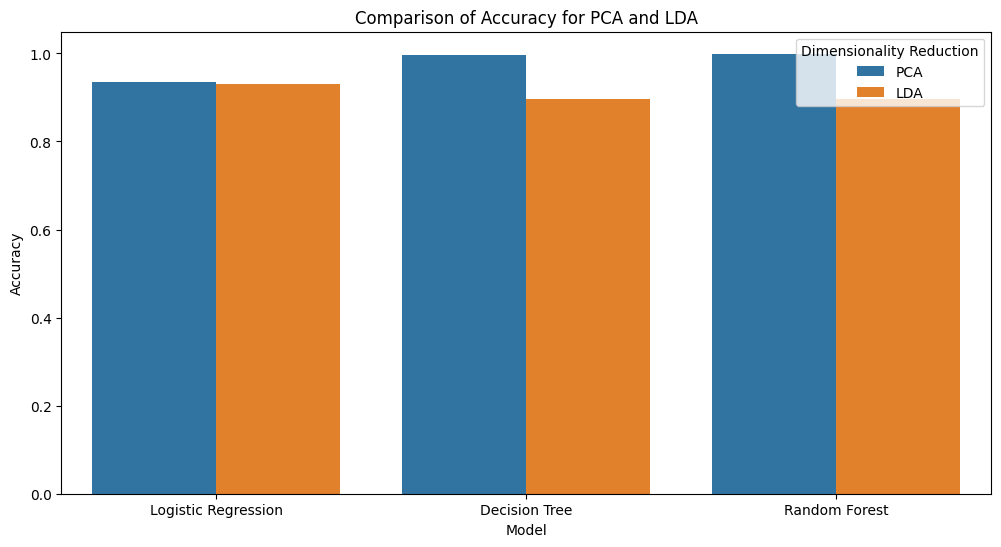

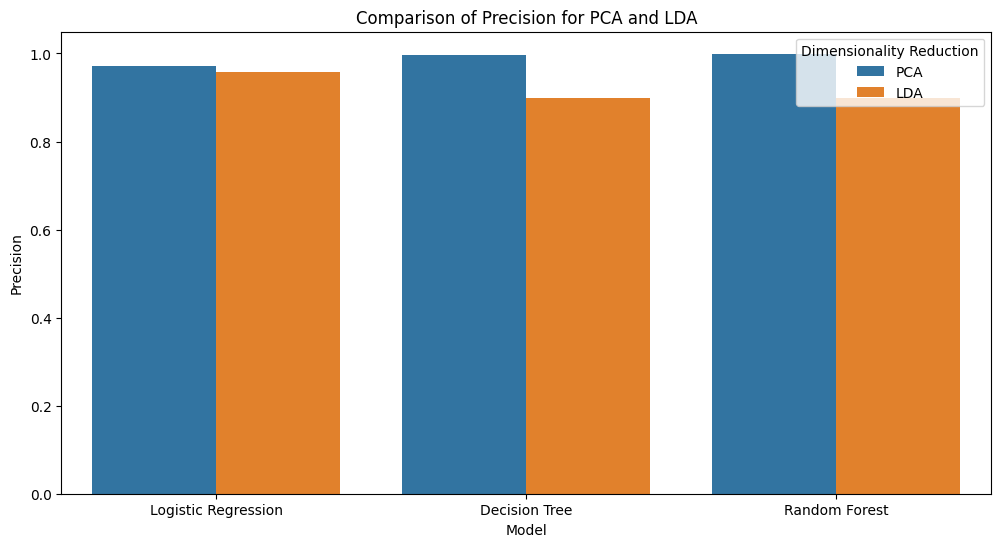

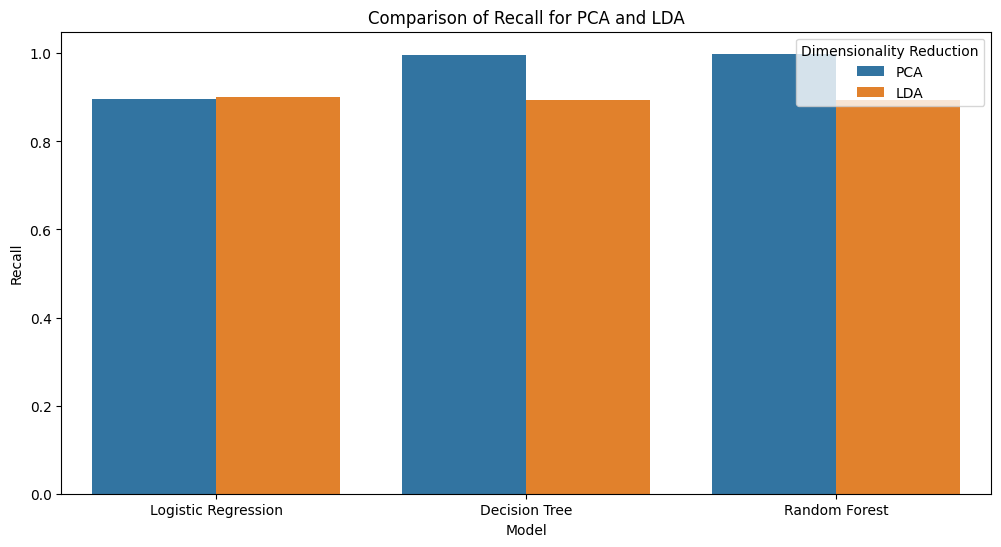

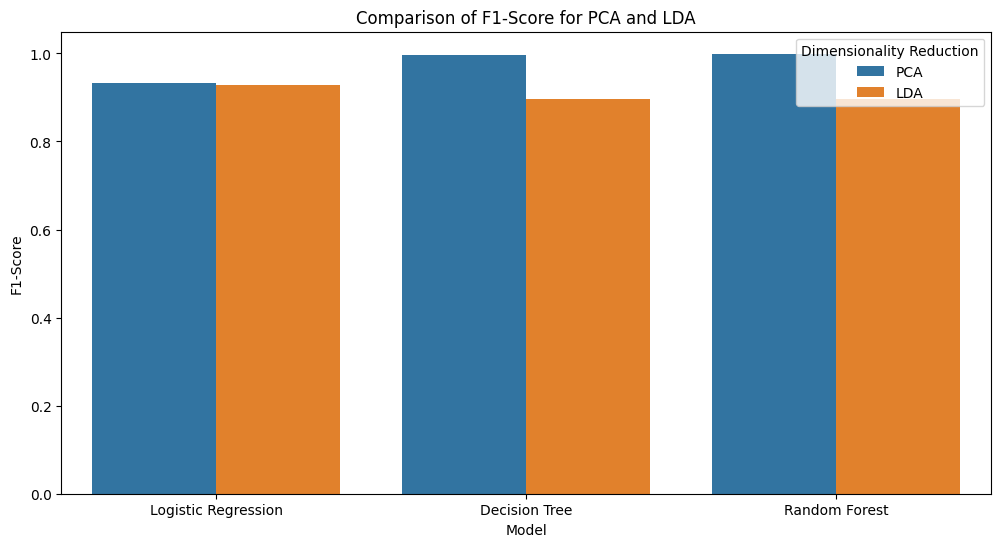

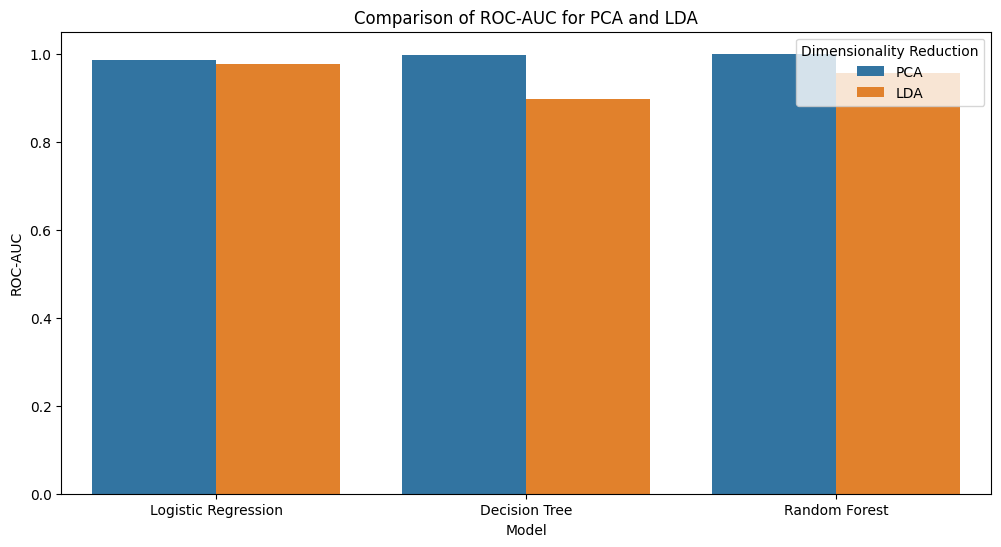

In [49]:
import matplotlib.pyplot as plt

# Function to plot comparison
def plot_comparison(metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Model", y=metric, hue="Dimensionality Reduction", data=results_df)
    plt.title(f'Comparison of {metric} for PCA and LDA')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.legend(title='Dimensionality Reduction')
    plt.show()

# Plot comparison for each metric
plot_comparison("Accuracy")
plot_comparison("Precision")
plot_comparison("Recall")
plot_comparison("F1-Score")
plot_comparison("ROC-AUC")


##Anomaly Detection

## Isolation Forest

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [51]:
#number of fraud values in training dataset
fraud_count = 0
for value in y_train:
  if value == 1:
    fraud_count += 1

In [52]:
#Percentage of fraud values the train dataset
anomaly_transaction_percentage = fraud_count/len(X_train)

In [53]:
# initialize and fit the model
clf = IsolationForest(contamination=anomaly_transaction_percentage)
clf.fit(X_train)


IsolationForest(contamination=0.4995851757707346)

In [54]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

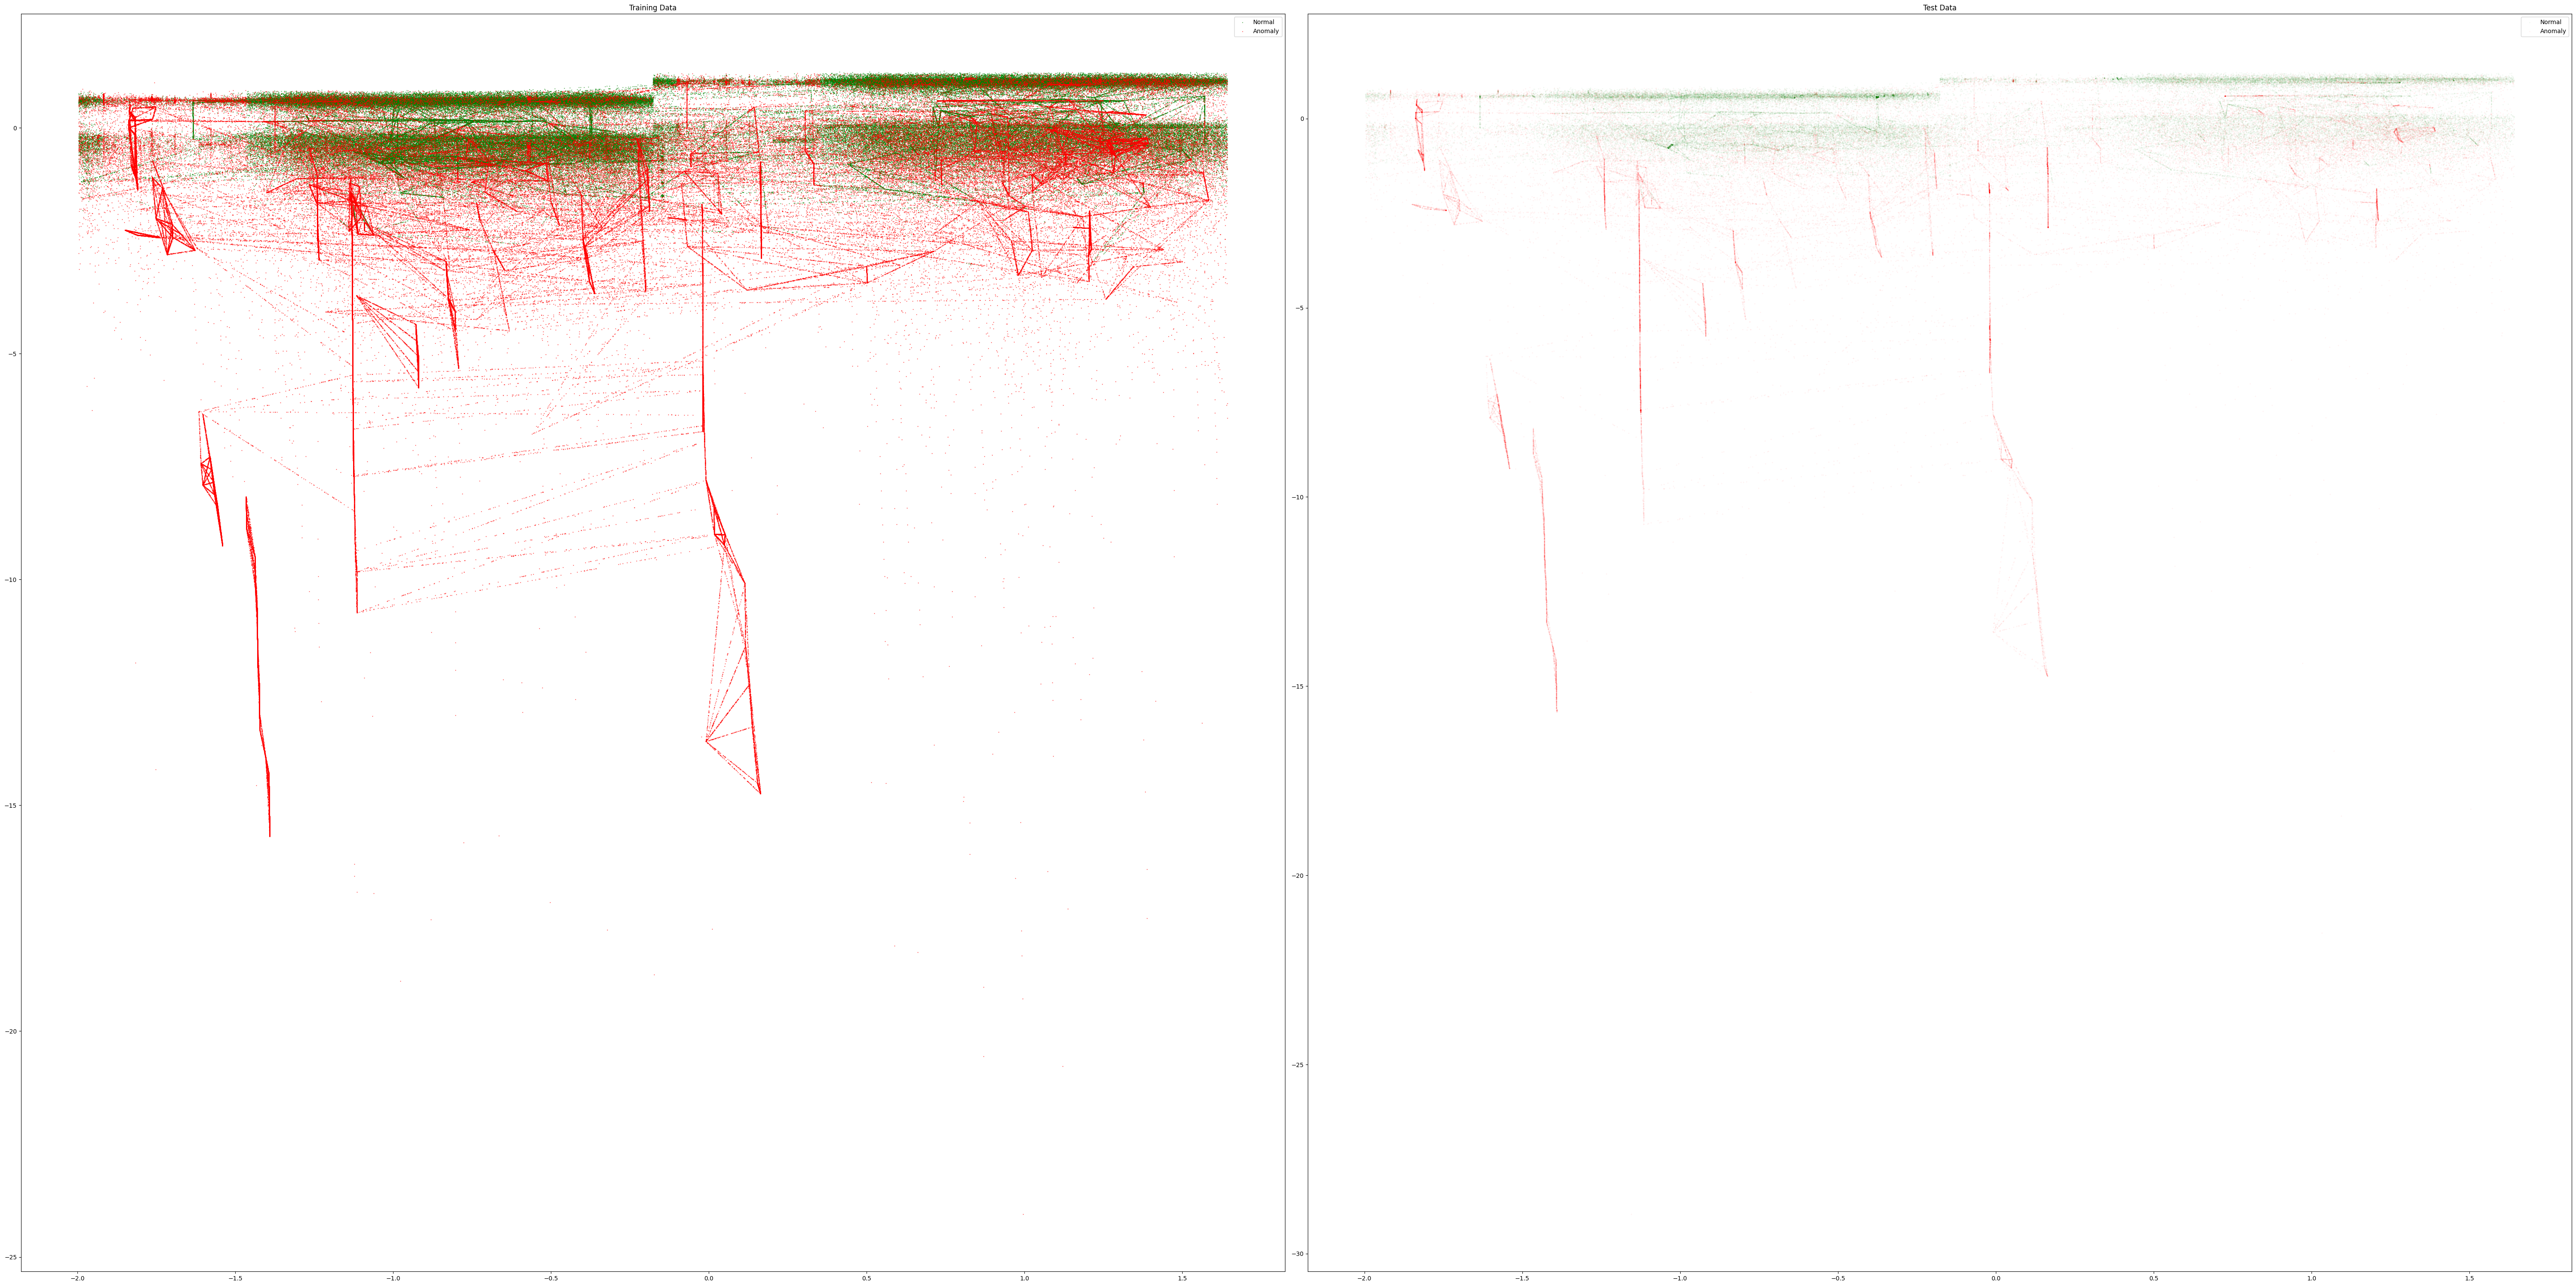

In [55]:
# Create scatter plots for visualization
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(60, 30))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal', marker = 'x', s = 0.1)
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly', marker = 'x', s = 0.1)
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal', marker = '.', s = 0.01)
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly', marker ='.', s = 0.01)
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')


In [56]:
# Function to calculate accuracy and confusion matrix
def acc_cm(y_pred_test , y_test):
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  for i, val in enumerate(y_test):
    if val == 1 and y_pred_test[i] == -1:
      true_pos += 1
    elif val == 0 and y_pred_test[i] == 1:
      true_neg += 1
    elif val == 0 and  y_pred_test[i] == -1:
      false_pos += 1
    elif val == 1 and y_pred_test[i] == 1:
      false_neg += 1

  acc = (true_pos + true_neg) / len(y_test)
  cm = [[true_pos, false_pos], [false_neg, true_neg]]

  return acc, cm
acc, con_mat = acc_cm(y_pred_test , y_test)

In [57]:
acc

0.6975428500820815

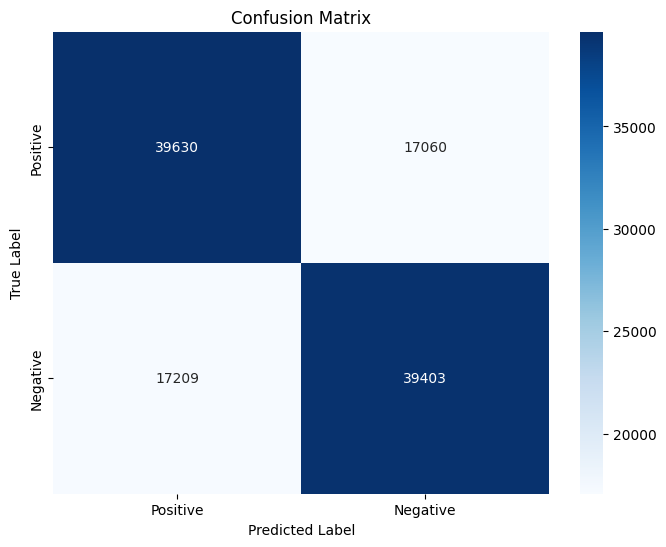

In [58]:
# Function to plot confusion matrix
def cm(matrix):
  confusion_matrix_values = matrix

  labels = ['Positive', 'Negative']

  # Create a heatmap using seaborn for better visualization
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix_values, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
cm(con_mat)

## Autoencoders

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="tanh")(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [60]:
# Use early stopping to find the optimal number of epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Use the autoencoder to make predictions
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# Set a threshold for anomaly detection
threshold = error_df['reconstruction_error'].quantile(0.995)
error_df['predicted_class'] = error_df['reconstruction_error'] > threshold
error_df['predicted_class'] = error_df['predicted_class'].astype(int)


Epoch 1/50
1771/1771 [==============================] - 7s 3ms/step - loss: 9.4590 - val_loss: 9.3168
Epoch 2/50
1771/1771 [==============================] - 4s 2ms/step - loss: 9.1582 - val_loss: 9.2370
Epoch 3/50
1771/1771 [==============================] - 7s 4ms/step - loss: 9.1056 - val_loss: 9.2051
Epoch 4/50
1771/1771 [==============================] - 4s 2ms/step - loss: 9.0855 - val_loss: 9.1941
Epoch 5/50
1771/1771 [==============================] - 4s 2ms/step - loss: 9.0757 - val_loss: 9.1855
Epoch 6/50
1771/1771 [==============================] - 7s 4ms/step - loss: 9.0692 - val_loss: 9.1799
Epoch 7/50
1771/1771 [==============================] - 5s 3ms/step - loss: 9.0643 - val_loss: 9.1759
Epoch 8/50
1771/1771 [==============================] - 5s 3ms/step - loss: 9.0605 - val_loss: 9.1724
Epoch 9/50
1771/1771 [==============================] - 7s 4ms/step - loss: 9.0575 - val_loss: 9.1705
Epoch 10/50
1771/1771 [==============================] - 5s 3ms/step - loss: 9.055

In [61]:

# Evaluation metrics
print("Autoencoder:")
print("Classification Report on Test Data:\n", classification_report(error_df['true_class'], error_df['predicted_class']))
print(f"ROC-AUC Score on Test Data: {roc_auc_score(error_df['true_class'], error_df['predicted_class'])}")


Autoencoder:
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     56463
           1       0.98      0.01      0.02     56839

    accuracy                           0.50    113302
   macro avg       0.74      0.50      0.34    113302
weighted avg       0.74      0.50      0.34    113302

ROC-AUC Score on Test Data: 0.5048289032789677


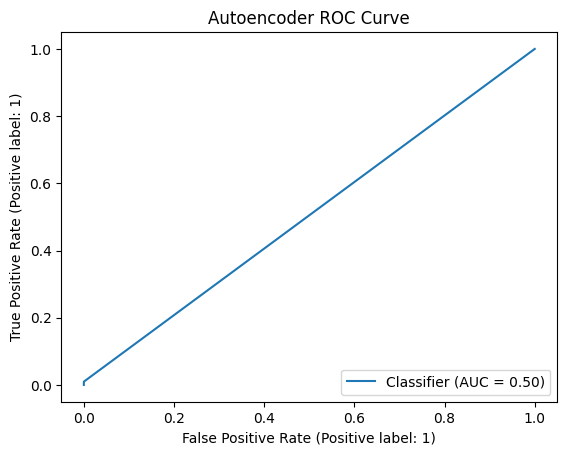

In [62]:
# ROC Curve
RocCurveDisplay.from_predictions(error_df['true_class'], error_df['predicted_class'])
plt.title('Autoencoder ROC Curve')
plt.show()

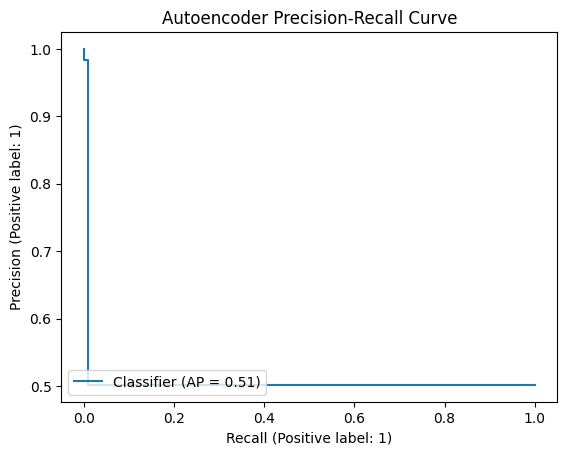

In [63]:

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(error_df['true_class'], error_df['predicted_class'])
plt.title('Autoencoder Precision-Recall Curve')
plt.show()

##Comparison of Anomaly Detection Methods

In [64]:
# Store evaluation metrics for anomaly detection comparison
anomaly_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

def evaluate_anomaly_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    anomaly_results["Model"].append(model_name)
    anomaly_results["Accuracy"].append(accuracy)
    anomaly_results["Precision"].append(precision)
    anomaly_results["Recall"].append(recall)
    anomaly_results["F1-Score"].append(f1)
    anomaly_results["ROC-AUC"].append(roc_auc)

# Evaluate Isolation Forest
evaluate_anomaly_model(y_test, [1 if x == -1 else 0 for x in y_pred_test], "Isolation Forest")

# Evaluate Autoencoder
evaluate_anomaly_model(error_df['true_class'], error_df['predicted_class'], "Autoencoder")

# Convert results to a DataFrame for better visualization
anomaly_results_df = pd.DataFrame(anomaly_results)
print(anomaly_results_df)


              Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Isolation Forest  0.697543   0.699065  0.697233  0.698148  0.697544
1       Autoencoder  0.503186   0.984127  0.009817  0.019440  0.504829


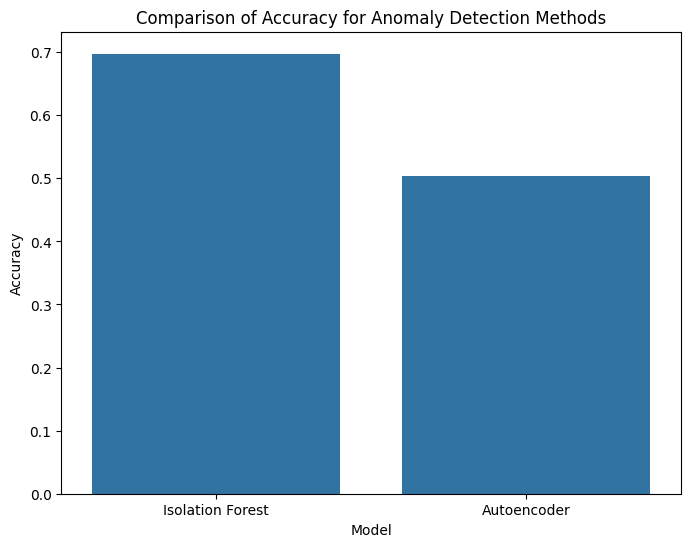

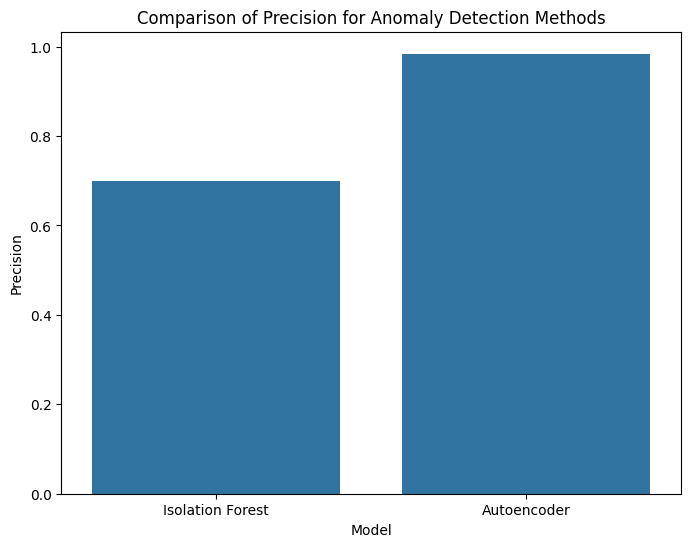

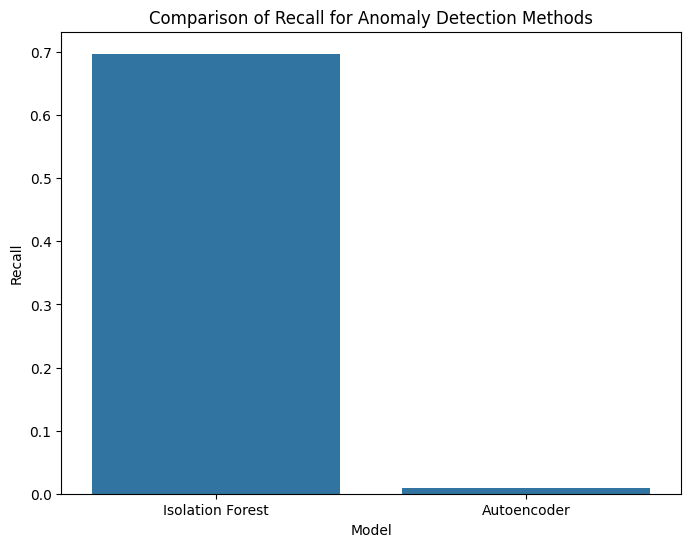

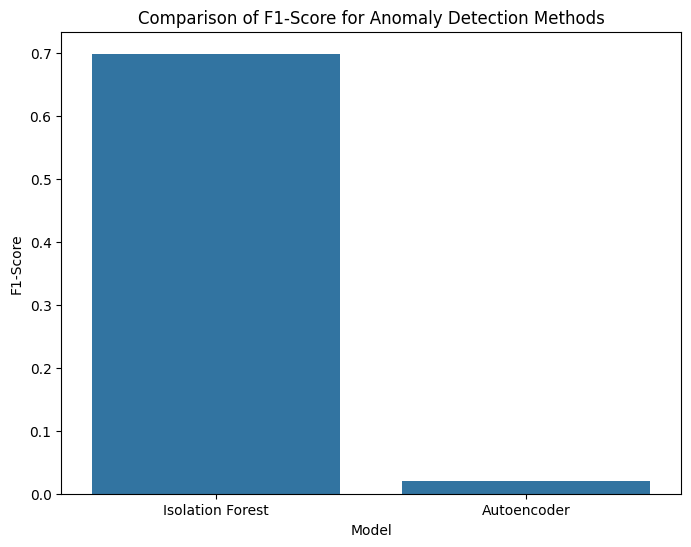

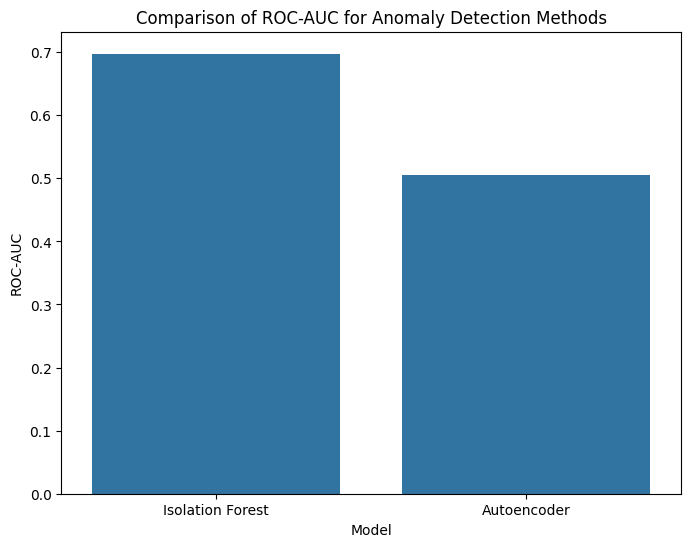

In [67]:
# Function to plot anomaly detection comparison
def plot_anomaly_comparison(metric):
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Model", y=metric, data=anomaly_results_df)
    plt.title(f'Comparison of {metric} for Anomaly Detection Methods')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.show()

# Plot comparison for each metric
plot_anomaly_comparison("Accuracy")
plot_anomaly_comparison("Precision")
plot_anomaly_comparison("Recall")
plot_anomaly_comparison("F1-Score")
plot_anomaly_comparison("ROC-AUC")
